In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

## Read Data

In [2]:
def plot_data(x_minlp=None, a_minlp=None, d_minlp=None, optD_a_minlp=None, optD_d_minlp=None, 
             x_nlp=None, a_nlp=None, d_nlp=None, optD_a_nlp=None, optD_d_nlp= None, 
             save=None):
    """
    objective means these solutions are based on what objective function. 
    For e.g., if it's A, it means it's A-optimality solution. We can still analyze its determinant value. 
    """
    

    label_minlp = "MILP: A-optimality"
    
    label_nlp = "LP: A-optimality" 
    color_minlp = "red"
    scatter_minlp = "*"
    color_nlp = "blue"
    scatter_nlp = "."
    marker_size=10


    optD_label_minlp = "MINLP: D-optimality"
    optD_label_nlp = "NLP: D-optimality"
    optD_color_minlp = "green"
    optD_scatter_minlp = "X"
    optD_color_nlp = "purple"
    optD_scatter_nlp = "s"
    optD_marker_size=5
        
        
    
    si=22
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    
    si_legend = 16
        
    # figure 1: A-optimality
    
    if a_nlp is not None:
        plt.plot(x_nlp, np.log10(a_nlp), linestyle="-", color=color_nlp, markersize=marker_size, 
                 marker=scatter_nlp, label=label_nlp)
    
    if optD_a_nlp is not None: 
        plt.plot(x_nlp, np.log10(optD_a_nlp), linestyle="-.", color=optD_color_nlp, 
                 markersize=optD_marker_size, marker=optD_scatter_nlp, label=optD_label_nlp)
    
    if a_minlp is not None:
        plt.scatter(x_minlp, np.log10(a_minlp), marker=scatter_minlp, s=200, 
                    color=color_minlp, label=label_minlp)
        
    if optD_a_minlp is not None:
        #plt.scatter(x_minlp, np.log10(optD_a_minlp), marker=optD_scatter_minlp, s=200, 
        #            color=optD_color_minlp, label=optD_label_minlp)
        plt.scatter(x_minlp, np.log10(optD_a_minlp), marker=optD_scatter_minlp, s=200, 
                    color=optD_color_minlp, label=optD_label_minlp)
        
        
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(A-optimality)', fontweight="bold")
    #plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_trace.pdf')
    plt.show()
    

    # figure 2 
    
        
    if d_nlp is not None: 
        plt.plot(x_nlp, np.log10(d_nlp), linestyle="-", color=color_nlp, markersize=marker_size, 
                 marker=scatter_nlp, label=label_nlp)
        
    if d_minlp is not None:
        plt.scatter(x_minlp, np.log10(d_minlp), marker=scatter_minlp, s=200, color=color_minlp, 
                    label=label_minlp)
        
    if optD_d_nlp is not None: 
        plt.plot(x_nlp, np.log10(optD_d_nlp), linestyle="-", color=optD_color_nlp, markersize=optD_marker_size, 
                 marker=optD_scatter_nlp, label=optD_label_nlp)
        
    if optD_d_minlp is not None:
        plt.scatter(x_minlp, np.log10(optD_d_minlp), marker=optD_scatter_minlp, s=200, color=optD_color_minlp, 
                    label=optD_label_minlp)
        
        
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(D-optimality)', fontweight="bold")
    #plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_det.pdf')
    plt.show()

In [3]:
def read_fim(name_str, ranges, obj="_a"):
    a_set, d_set = [], []
    
    for i in ranges:
        #name = name_str+str(i)
        name = name_str + str(i) + obj
        with open(name, 'rb') as f:
            x = pickle.load(f)
        
        a_set.append(np.trace(x))
        d_set.append(np.linalg.det(x))
        
    return a_set, d_set
        

## Kinetics, Merged

In [4]:
x_gurobi = [1000, 1400, 1800, 2200, 
         2600, 3000, 3400, 3800, 
         4200, 4600, 5000]
x_gurobi_legend = [i/1000 for i in x_gurobi]


nlp_ranges = np.linspace(1000, 5000, 41)

nlp_ranges = [int(i) for i in nlp_ranges]
nlp_label = [i/1000 for i in nlp_ranges]
print(nlp_label)


[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


In [5]:
# nlp results
nlp_a, nlp_d = read_fim('./kinetics_results/May9_fim_', nlp_ranges)
gurobi_a_file, gurobi_d_file = read_fim('./kinetics_results/May2_fim_',x_gurobi)

d_nlp_a, d_nlp_d = read_fim('./kinetics_results/May4_fim_', nlp_ranges, obj="_d")
mindt_a_file, mindt_d_file = read_fim('./kinetics_results/Dec9_fim_',x_gurobi, obj="_d_mip")
#mindt_a_file, mindt_d_file = read_fim('./kinetics_results/Oct24_alpha0p1_fim_',x_gurobi, obj="_d_mip")
#mindt_a_file, mindt_d_file = read_fim('./kinetics_results/Oct26_fim_',x_gurobi, obj="_d_mip")

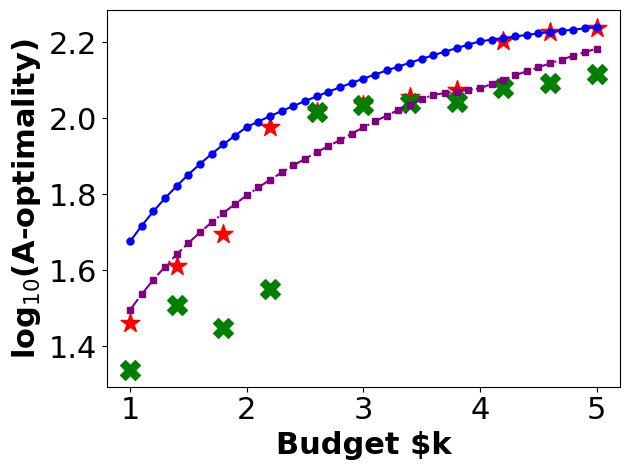

/tmp/ipykernel_932554/2967717875.py:76: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(x_minlp, np.log10(d_minlp), marker=scatter_minlp, s=200, color=color_minlp,


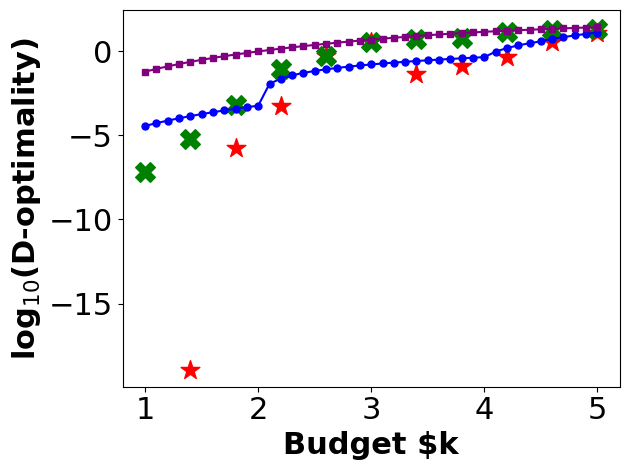

In [6]:
plot_data(x_minlp = x_gurobi_legend, a_minlp=gurobi_a_file, d_minlp = gurobi_d_file, 
          optD_a_minlp=mindt_a_file, optD_d_minlp=mindt_d_file, 
          x_nlp = nlp_label, a_nlp = nlp_a, d_nlp =nlp_d, optD_a_nlp = d_nlp_a, optD_d_nlp = d_nlp_d,
          save='kinetics_merge')

## Operating Cost

In [7]:
mindt_a_file, mindt_d_file = read_fim('./kinetics_results/Dec9_fim_',x_gurobi, obj="_d_mip")

operate_x = [1000, 1400, 1800, 2200, 2600, 3000, 3100, 3500, 3900, 4300, 4700, 5100]

mindt_a_file2, mindt_d_file2 = read_fim('./kinetics_results/Dec12_fim_',operate_x, obj="_d_mip")
print(mindt_a_file2)

[21.795716787857867, 32.1574031080986, 28.129804055970467, 35.50114415400877, 45.52016393657081, 55.09464424169989, 108.30708632638974, 109.74575714302021, 110.13566897659004, 119.91472396275148, 124.02023241446473, 130.63535063584396]


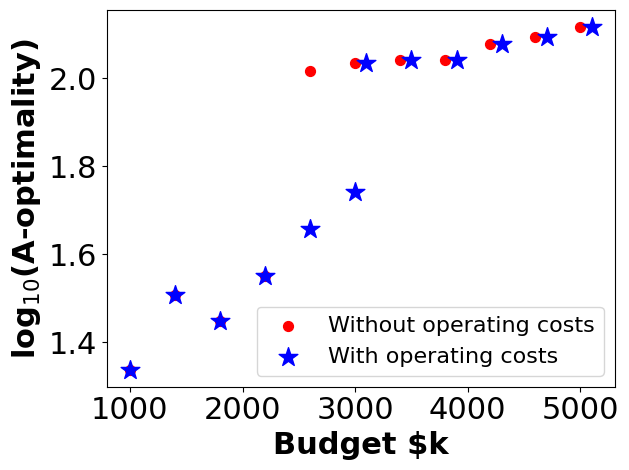

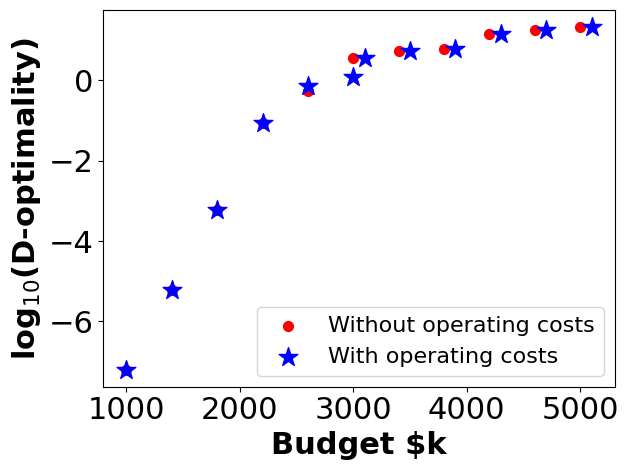

In [8]:
def compare(x1, x2, y1_a, y2_a, y1_b, y2_b):
    si=22
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    
    si_legend = 16
    
    
    plt.scatter(x1, np.log10(y1_a), marker=".", s=200, color="red", label = "Without operating costs")
    plt.scatter(x2, np.log10(y2_a), marker="*", s=200, color="blue", label="With operating costs")
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(A-optimality)', fontweight="bold")
    plt.legend( fontsize=16)
    plt.tight_layout()
    plt.savefig('operate_trace.pdf')
    plt.show()
    
    
    plt.scatter(x1, np.log10(y1_b), marker=".", s=200, color="red", label = "Without operating costs")
    plt.scatter(x2, np.log10(y2_b), marker="*", s=200, color="blue", label="With operating costs")
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(D-optimality)', fontweight="bold")
    plt.legend( fontsize=16)
    plt.tight_layout()
    plt.savefig('operate_det.pdf')
    plt.show()
    
compare(x_gurobi, operate_x, mindt_a_file, mindt_a_file2,  mindt_d_file, mindt_d_file2)
    

## Rotary bed, merge

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0]


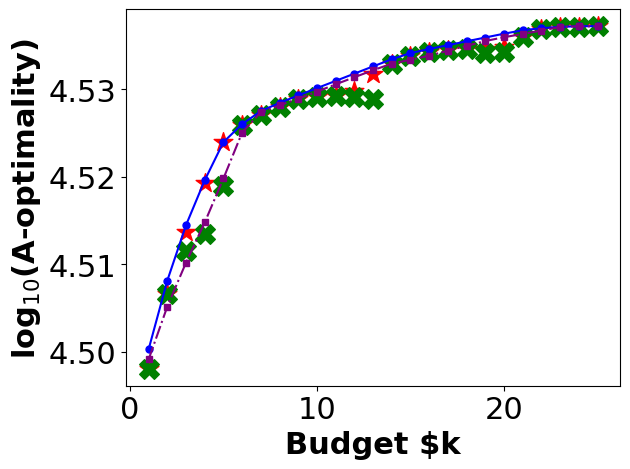

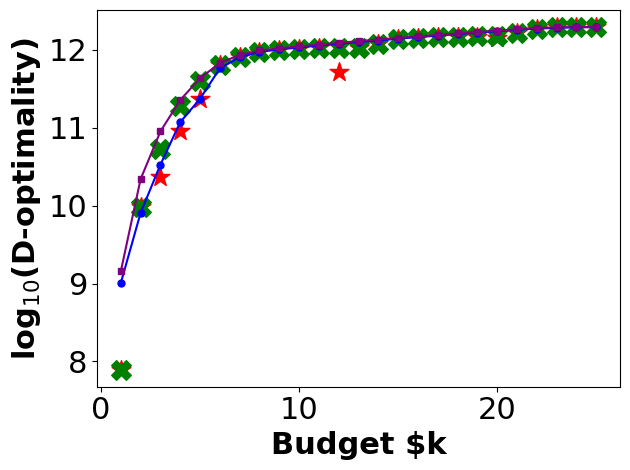

In [9]:
nlp_ranges = np.linspace(1000, 25000, 25)
nlp_ranges = [int(i) for i in nlp_ranges]
nlp_label = [i/1000 for i in nlp_ranges]
print(nlp_label)


a_gurobi, d_gurobi = read_fim('./rotary_results/Apr17_FIM_A_mip_', nlp_ranges, obj="")

nlp_a_file, nlp_d_file = read_fim('./rotary_results/May12_fim_', nlp_ranges, obj="_a")

optD_nlp_a_file, optD_nlp_d_file = read_fim('./rotary_results/May10_fim_', nlp_ranges, obj="_d")

#optD_minlp_a_file, optD_minlp_d_file = read_fim('./rotary_results/Oct31_fim_', nlp_ranges, obj="_d_mip")
optD_minlp_a_file, optD_minlp_d_file = read_fim('./rotary_results/Dec7_fim_', nlp_ranges, obj="_d_mip")


plot_data(x_minlp = nlp_label, a_minlp=a_gurobi, d_minlp = d_gurobi, 
          optD_a_minlp=optD_minlp_a_file, optD_d_minlp=optD_minlp_d_file, 
          x_nlp = nlp_label, a_nlp = nlp_a_file, d_nlp =nlp_d_file, 
          optD_a_nlp = optD_nlp_a_file, optD_d_nlp = optD_nlp_d_file, 
          
          save='rotary_merge')



## Solution visualize 

In [10]:
def read_solution(name_str, ranges, obj="_a"):
    ca_static = [] # length = len(ranges), element are in [0,1]
    cb_static = []
    cc_static = []
    ca_dynamic = [] # length = len(ranges), element are in [0,8], are the total numbers of selected measurements
    cb_dynamic = [] 
    cc_dynamic = [] 
    
    for i in ranges:
        #name = name_str+str(i)
        name = name_str + str(i) + obj
        with open(name, 'rb') as f:
            x = pickle.load(f)
        
        ca_static.append(x[0][0])
        cb_static.append(x[1][1])
        cc_static.append(x[2][2])
        
        ca_dynamic.append(sum(x[i][i] for i in range(3,11)))
        cb_dynamic.append(sum(x[i][i] for i in range(11,19)))
        cc_dynamic.append(sum(x[i][i] for i in range(19,27)))
        
    return [ca_static, cb_static, cc_static, ca_dynamic, cb_dynamic, cc_dynamic]
        

In [15]:
dd = read_solution('./kinetics_results/May9_', [3000])

x_gurobi = [1000, 1400, 1800, 2200, 
         2600, 3000, 3400, 3800, 
         4200, 4600, 5000]
x_gurobi_legend = [i/1000 for i in x_gurobi]


nlp_ranges = np.linspace(1000, 5000, 41)

nlp_ranges = [int(i) for i in nlp_ranges]
nlp_label = [i/1000 for i in nlp_ranges]
print(nlp_label)

[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


In [16]:
# nlp results
nlp_a_sol = read_solution('./kinetics_results/May9_', nlp_ranges)
milp_a_sol = read_solution('./kinetics_results/May2_',x_gurobi)

nlp_d_sol = read_solution('./kinetics_results/May4_', nlp_ranges, obj="_d")
minlp_d_sol = read_solution('./kinetics_results/Oct24_alpha0p1_',x_gurobi, obj="_d_mip")

In [17]:
def plot_one_solution(a_sol, a_mip_sol, d_sol, d_mip_sol, 
                     y_label, save_name):
    
    label_minlp = "MILP: A-optimality"
    
    label_nlp = "LP: A-optimality" 
    color_minlp = "red"
    scatter_minlp = "*"
    color_nlp = "blue"
    scatter_nlp = "."
    marker_size=10

    optD_label_minlp = "MINLP: D-optimality"
    optD_label_nlp = "NLP: D-optimality"
    optD_color_minlp = "green"
    optD_scatter_minlp = "X"
    optD_color_nlp = "purple"
    optD_scatter_nlp = "s"
    optD_marker_size=5
        
        
    
    si=22
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    
    si_legend = 16
    
    plt.plot(nlp_label, a_sol, linestyle="-", color=color_nlp, markersize=marker_size, 
                 marker=scatter_nlp, label=label_nlp)
    plt.plot(nlp_label, d_sol, linestyle="-.", color=optD_color_nlp, markersize=optD_marker_size, 
                 marker=optD_scatter_nlp, label=optD_label_nlp)
    plt.scatter(x_gurobi_legend, a_mip_sol,  marker=scatter_minlp, s=200, 
                    color=color_minlp, label=label_minlp)
    plt.scatter(x_gurobi_legend, d_mip_sol,  marker=optD_scatter_minlp, s=200, 
                    color=optD_color_minlp, label=optD_label_minlp)
    
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel(y_label, fontweight="bold")
    #plt.legend(loc="upper left", fontsize=si_legend)
    plt.tight_layout()
    plt.savefig(save_name+'.pdf')
    plt.show()

def plot_solution(a_sol, a_mip_sol, d_sol, d_mip_sol):
    
    # static CA
    plot_one_solution(a_sol[0], a_mip_sol[0], d_sol[0], d_mip_sol[0], "C$_A$ Static", "CA_static_sol")
    plot_one_solution(a_sol[1], a_mip_sol[1], d_sol[1], d_mip_sol[1], "C$_B$ Static", "CB_static_sol")
    plot_one_solution(a_sol[2], a_mip_sol[2], d_sol[2], d_mip_sol[2], "C$_C$ Static", "CC_static_sol")
    
    # dynamic
    plot_one_solution(a_sol[3], a_mip_sol[3], d_sol[3], d_mip_sol[3], "C$_A$ Dynamic", "CA_dynamic_sol")
    plot_one_solution(a_sol[4], a_mip_sol[4], d_sol[4], d_mip_sol[4], "C$_B$ Dynamic", "CB_dynamic_sol")
    plot_one_solution(a_sol[5], a_mip_sol[5], d_sol[5], d_mip_sol[5], "C$_C$ Dynamic", "CC_dynamic_sol")
    
    

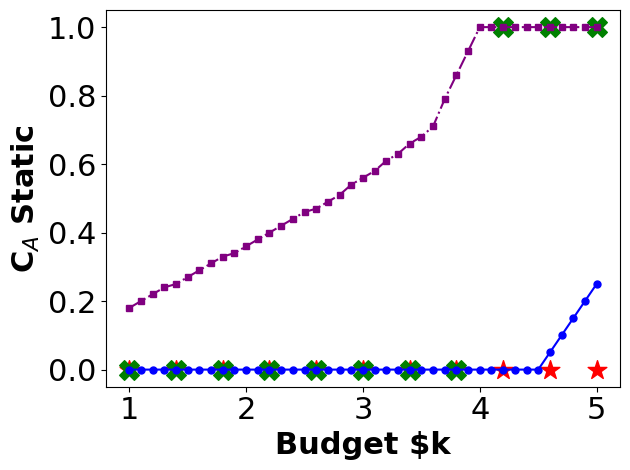

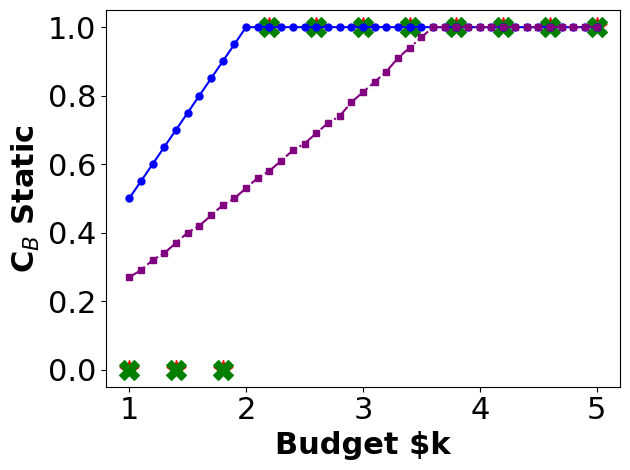

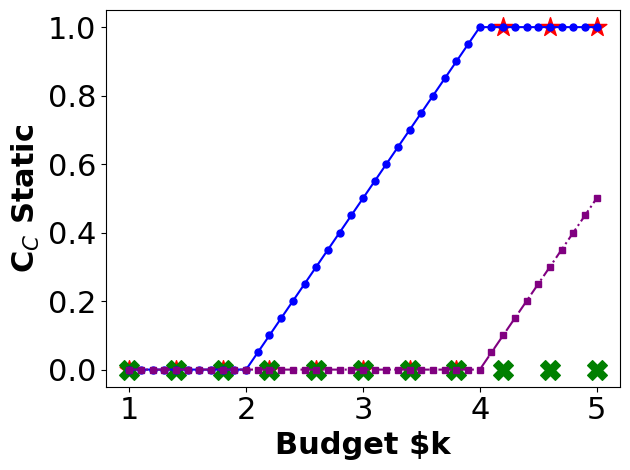

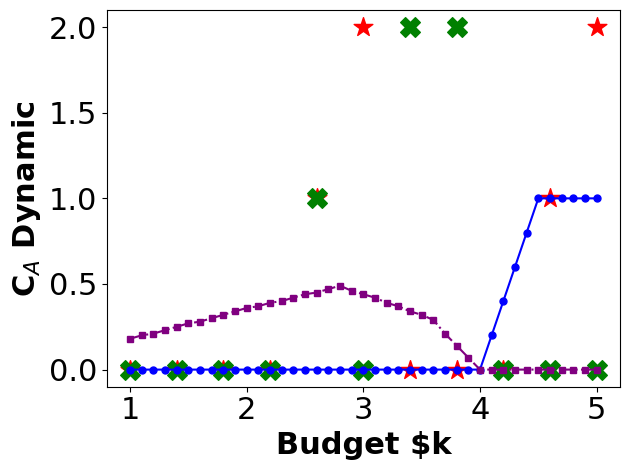

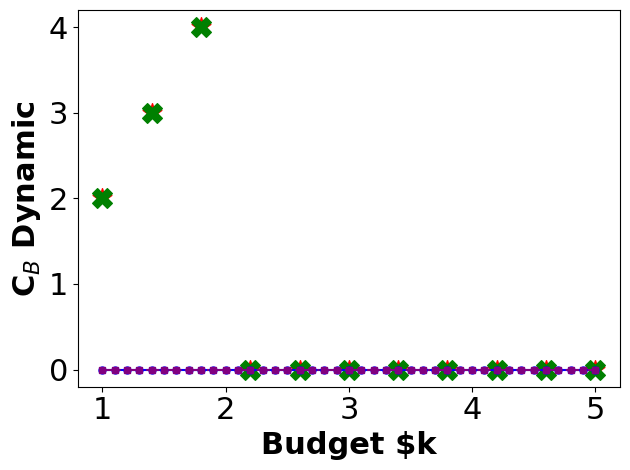

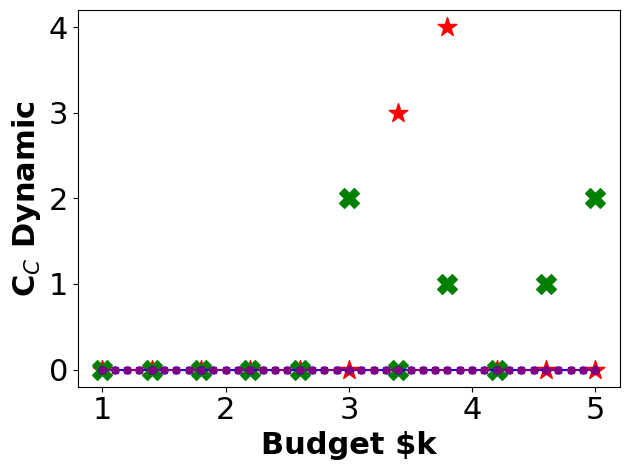

In [18]:
plot_solution(nlp_a_sol, milp_a_sol, nlp_d_sol, minlp_d_sol)

## Time and iterations

In [19]:
def read_time_iter(file_name, budgets):
    with open(file_name, 'rb') as f:
        nlp_dict = pickle.load(f)
        f.close()

    nlp_time, nlp_iter = [], [] 

    for item in budgets:

        nlp_time.append(nlp_dict[item]["t"])
        nlp_iter.append(nlp_dict[item]["n"])

    return nlp_time, nlp_iter
        
    


In [21]:
def iteration(x, y, nlp=True, name=None):
    si=24
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    
    optD_color_minlp = "green"
    optD_scatter_minlp = "X"
    optD_color_nlp = "purple"
    optD_scatter_nlp = "s"
    optD_marker_size=5

    if nlp:
        plt.scatter(x, y, marker = "s", color=optD_color_nlp, 
         s=150)
        
    else:
        plt.scatter(x, y, marker=optD_scatter_minlp, s=200, 
            color=optD_color_minlp)

    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('Iterations', fontweight="bold")
    #plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    plt.savefig(name)
    plt.show()

### kinetics

In [20]:
budget_labels =  [1, 1.4, 1.8, 2.2, 2.6, 3, 3.4, 3.8, 4.2, 4.6, 5]

budgets_opt = [1000, 1400, 1800, 2200, 2600, 3000,
             3400, 3800, 4200, 4600, 5000]
    
nlp_time_k, nlp_iter_k = read_time_iter('kinetics_time_iter_nlp', budgets_opt)
minlp_time_k, minlp_iter_k = read_time_iter('kinetics_time_iter_minlp', budgets_opt)

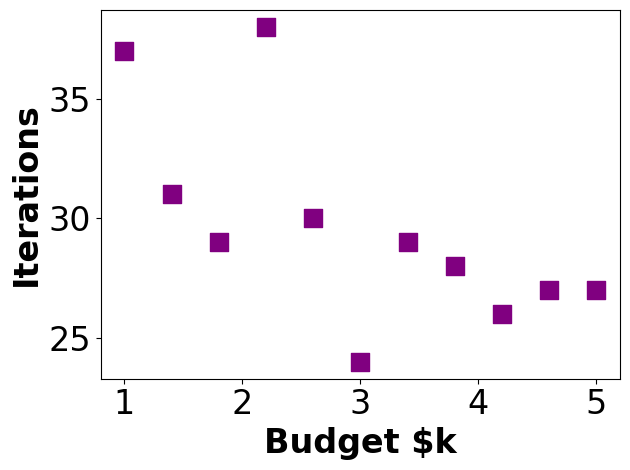

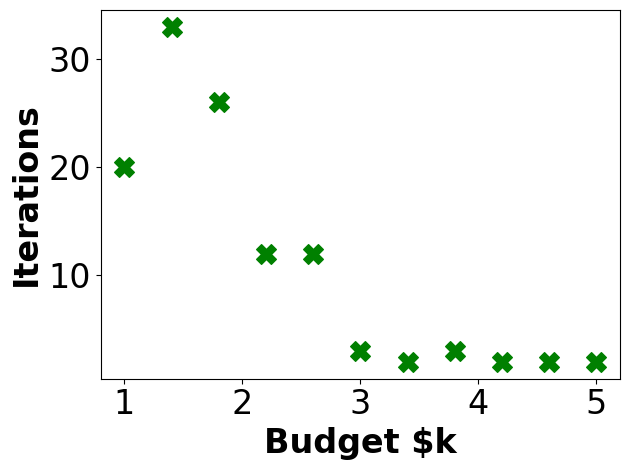

In [22]:
iteration(budget_labels, nlp_iter_k, nlp=True, name='kinetics_iter_nlp.pdf')
iteration(budget_labels, minlp_iter_k, nlp=False, name='kinetics_iter_minlp.pdf')

### Rotary

In [23]:
budget_labels = range(1,26)

budgets_opt = np.linspace(1000, 25000,25)
print(budgets_opt)

nlp_time_r, nlp_iter_r = read_time_iter('rotary_time_iter_nlp', budgets_opt)
minlp_time_r, minlp_iter_r = read_time_iter('rotary_time_iter_minlp', budgets_opt)

[ 1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000. 10000.
 11000. 12000. 13000. 14000. 15000. 16000. 17000. 18000. 19000. 20000.
 21000. 22000. 23000. 24000. 25000.]


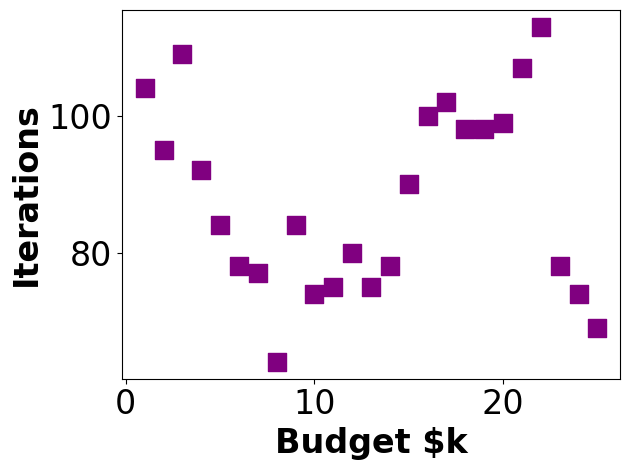

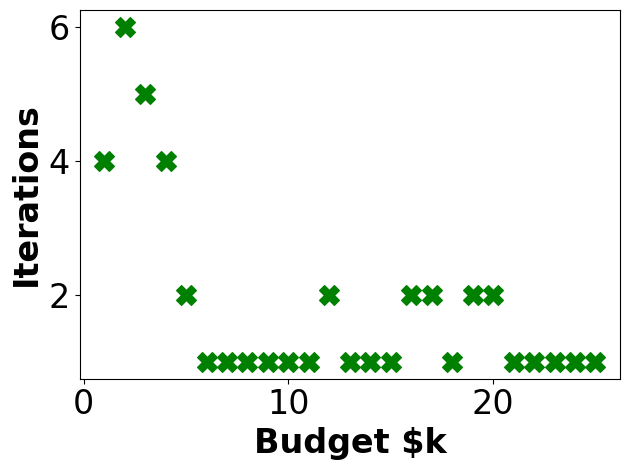

In [24]:
iteration(budget_labels, nlp_iter_r, nlp=True, name='rotary_iter_nlp.pdf')
iteration(budget_labels, minlp_iter_r, nlp=False, name='rotary_iter_minlp.pdf')

### Time

In [26]:
def alltime(x, lp_time, nlp_time, milp_time, minlp_time, name):
    label_minlp = "MILP maximizing A-optimality"

    label_nlp = "LP maximizing A-optimality" 
    color_minlp = "red"
    scatter_minlp = "*"
    color_nlp = "blue"
    scatter_nlp = "."
    marker_size=10


    optD_label_minlp = "MINLP maximizing D-optimality"
    optD_label_nlp = "NLP maximizing D-optimality"
    optD_color_minlp = "green"
    optD_scatter_minlp = "X"
    optD_color_nlp = "purple"
    optD_scatter_nlp = "s"
    optD_marker_size=5



    si=24
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)

    si_legend = 14


    plt.plot(x, lp_time, linestyle="-", color=color_nlp, markersize=marker_size, 
             marker=scatter_nlp, label=label_nlp)


    plt.plot(x, milp_time, linestyle="-.", color=optD_color_nlp, 
             markersize=optD_marker_size, marker=optD_scatter_nlp, label=optD_label_nlp)


    plt.scatter(x, nlp_time, marker=scatter_minlp, s=200, 
                color=color_minlp, label=label_minlp)

    plt.scatter(x, minlp_time, marker=optD_scatter_minlp, s=200, 
                color=optD_color_minlp, label=optD_label_minlp)


    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('Time [s]', fontweight="bold")
    #plt.legend(bbox_to_anchor=(0.12, 0.35), loc="center left", fontsize=si_legend)
    plt.tight_layout()
    plt.savefig(name)
    plt.show()


### kinetics

In [27]:
with open("kinetics_time_lp", 'rb') as f:
    lp_time_k = pickle.load(f)
    f.close()

with open("kinetics_time_milp", 'rb') as fs:
    milp_time_k = pickle.load(fs)
    fs.close()

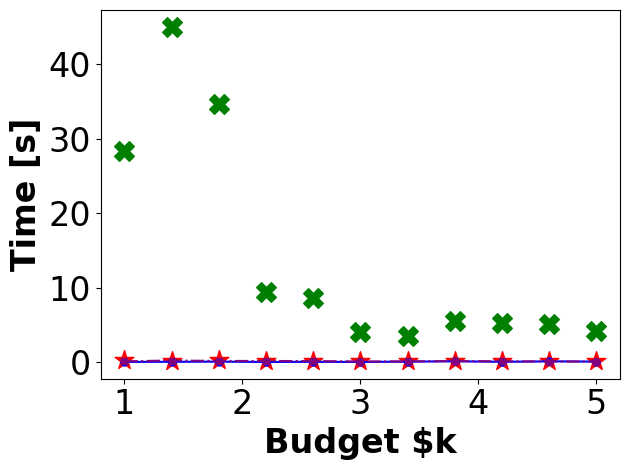

In [28]:
    
budget_labels =  [1, 1.4, 1.8, 2.2, 2.6, 3, 3.4, 3.8, 4.2, 4.6, 5]
alltime(budget_labels, lp_time_k, nlp_time_k, milp_time_k, minlp_time_k, "kinetics_time.pdf")

### Rotary

In [29]:
with open("rotary_time_lp", 'rb') as f:
    lp_time_r = pickle.load(f)
    f.close()

with open("rotary_time_milp", 'rb') as fs:
    milp_time_r = pickle.load(fs)
    fs.close()

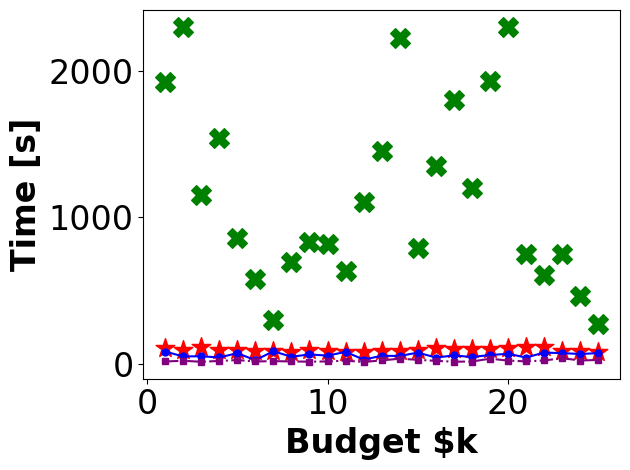

In [30]:
budget_labels = range(1,26)
alltime(budget_labels, lp_time_r, nlp_time_r, milp_time_r, minlp_time_r, "rotary_time.pdf")

## Old code. Not used
### kinetics, A-optimality

In [ ]:
def plot_data(x_minlp=None, a_minlp=None, d_minlp=None,
             x_nlp=None, a_nlp=None, d_nlp=None, 
             objective = "A", save=None):
    """
    objective means these solutions are based on what objective function. 
    For e.g., if it's A, it means it's A-optimality solution. We can still analyze its determinant value. 
    """
    
    if objective == "A":
        label_minlp = "MILP: A-optimality"
        label_nlp = "NLP: A-optimality" 
        color_minlp = "red"
        scatter_minlp = "*"
        color_nlp = "blue"
        scatter_nlp = "."
        marker_size=10
    elif objective=="D":
        label_minlp = "MILP: D-optimality"
        label_nlp = "NLP: D-optimality"
        color_minlp = "green"
        scatter_minlp = "X"
        color_nlp = "purple"
        scatter_nlp = "s"
        marker_size=5
    
    si=18
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    
    si_legend = 16
        
    # figure 1 
    
    if a_nlp is not None:
        plt.plot(x_nlp, np.log10(a_nlp), linestyle="-", color=color_nlp, markersize=marker_size, marker=scatter_nlp, label=label_nlp)
        
    if a_minlp is not None:
        plt.scatter(x_minlp, np.log10(a_minlp), marker=scatter_minlp, s=200, color=color_minlp, label=label_minlp)
        
        
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(A-optimality)', fontweight="bold")
    plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_trace.pdf')
    plt.show()
    

    # figure 2 
    
        
    if d_nlp is not None: 
        plt.plot(x_nlp, np.log10(d_nlp), linestyle="-", color=color_nlp, markersize=marker_size, marker=scatter_nlp, label=label_nlp)
        
    if d_minlp is not None:
        plt.scatter(x_minlp, np.log10(d_minlp), marker=scatter_minlp, s=200, color=color_minlp, label=label_minlp)
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(D-optimality)', fontweight="bold")
    plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_det.pdf')
    plt.show()


def read_fim(name_str, ranges, obj="_a"):
    a_set, d_set = [], []
    
    for i in ranges:
        #name = name_str+str(i)
        name = name_str + str(i) + obj
        with open(name, 'rb') as f:
            x = pickle.load(f)
        
        a_set.append(np.trace(x))
        d_set.append(np.linalg.det(x))
        
    return a_set, d_set
        

In [ ]:
nlp_ranges = np.linspace(1000, 5000, 41)


nlp_ranges = [int(i) for i in nlp_ranges]
nlp_label = [i/1000 for i in nlp_ranges]
print(nlp_label)

# nlp results
nlp_a, nlp_d = read_fim('./kinetics_results/May9_fim_', nlp_ranges)

In [ ]:
x_gurobi = [1000, 1400, 1800, 2200, 
         2600, 3000, 3400, 3800, 
         4200, 4600, 5000]
x_gurobi_legend = [i/1000 for i in x_gurobi]

gurobi_a_file, gurobi_d_file = read_fim('./kinetics_results/May2_fim_',x_gurobi)

plot_data(x_minlp = x_gurobi_legend, a_minlp=gurobi_a_file, d_minlp = gurobi_d_file, 
          x_nlp = nlp_label, a_nlp = nlp_a, d_nlp =nlp_d, save='kinetics_A')

### kinetics, d-optimality

we now only have continuous convex results

In [ ]:
d_nlp_a, d_nlp_d = read_fim('./kinetics_results/May4_fim_', nlp_ranges, obj="_d")

plot_data(x_nlp = nlp_label, a_nlp = nlp_a, d_nlp =nlp_d, save='kinetics_D', objective="D")

### Rotary bed, A-optimality 

In [ ]:
nlp_ranges = np.linspace(1000, 25000, 25)
nlp_ranges = [int(i) for i in nlp_ranges]
nlp_label = [i/1000 for i in nlp_ranges]
print(nlp_label)

a_gurobi, d_gurobi = read_fim('./rotary_results/Apr17_FIM_A_mip_', nlp_ranges, obj="")

nlp_a_file, nlp_d_file = read_fim('./rotary_results/May12_fim_', nlp_ranges, obj="_a")


plot_data(x_minlp = nlp_label, a_minlp=a_gurobi, d_minlp = d_gurobi, 
          x_nlp = nlp_label, a_nlp = nlp_a_file, d_nlp =nlp_d_file, save='rotary_A')

In [ ]:
nlp_a_file, nlp_d_file = read_fim('./rotary_results/May10_fim_', nlp_ranges, obj="_d")

trace.png
plot_data(x_nlp = nlp_label, a_nlp = nlp_a_file, d_nlp =nlp_d_file, save='rotary_D', objective="D")

### old code

In [ ]:
# store data 

record_ad = {}

record_ad['x'] = x_axis
record_ad['A'] = a_set
record_ad['D'] = d_set

print(record_ad)

store = pd.DataFrame(record_ad)

store.to_csv('A_5.csv')

In [ ]:
data5 = pd.read_csv('A_5.csv')
data22 = pd.read_csv('A_22.csv')
data44 = pd.read_csv('A_44.csv')
data110 = pd.read_csv('A_110.csv')




In [ ]:
budget = data5['x'].tolist()+ data22['x'].tolist() + data44['x'].tolist() + data110['x'].tolist()

print(budget)

a_list = data5['A'].tolist()+ data22['A'].tolist() + data44['A'].tolist() + data110['A'].tolist()


def plot_all(data5, data22, data44, data110, opt="A"):
    
    si=18
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    
    plt.scatter(data5['x'].tolist(), np.log10(data5[opt].tolist()), label="5 timepoints/measurement")
    plt.scatter(data22['x'].tolist(), np.log10(data22[opt].tolist()), label="22 timepoints/measurement")
    plt.scatter(data44['x'].tolist(), np.log10(data44[opt].tolist()), label="44 timepoints/measurement")
    plt.scatter(data110['x'].tolist(), np.log10(data110[opt].tolist()), label="110 timepoints/measurement")
    
    plt.xlabel("Budget [$]", fontweight="bold")
    plt.ylabel("log10("+str(opt)+"-optimality", fontweight="bold")
    #plt.legend(fontsize=14)
    #plt.savefig('test.pdf')
    plt.savefig('test.png', dpi=300)
    plt.show()
    

In [ ]:
plot_all(data5, data22, data44, data110, opt="D")

## Plot cov_y 

In [ ]:
def read_cov(name_str):
    with open(name_str, 'rb') as f:
        x = pickle.load(f)
        
    sol = x.diagonal()

    num_time = 8
    num_measure = 6
    num_static = 3
    sol_2d = np.zeros((num_measure,num_time))

    for i in range(num_measure):
        for j in range(num_time):
            if i<num_static:
                sol_2d[i,j] = sol[i]
            else:
                #print((i-num_static)*num_time+j)
                sol_2d[i,j] = sol[(i-num_static)*num_time+j+num_static]
    
    return sol_2d[0,0], sol_2d[1,0], sol_2d[2,0], sol_2d[3], sol_2d[4], sol_2d[5]

In [ ]:
#print(read_cov('./kinetics_results/May4_5000_d'))
print(read_cov('./kinetics_results/May2_1000_a'))

In [ ]:
gurobi = False
optimal = "D"

# x label 
if gurobi:
    x_axis = np.linspace(1000, 5000, 11)
else:
    x_axis = np.linspace(1000, 5000, 41)
    
x_axis = [int(i) for i in x_axis]
x_legend = [i/1000 for i in x_axis]

static_ca_list, static_cb_list, static_cc_list = [], [], []
dynamic_ca_list, dynamic_cb_list, dynamic_cc_list = [], [], []

for i in x_axis:
    if gurobi and optimal=="A":
        name = './kinetics_results/May2_'+str(i)+'_a'
    elif optimal == "A":
        name = './kinetics_results/May9_'+str(i)+'_a'
    elif optimal == 'D':
        name = './kinetics_results/May4_'+str(i)+'_d'
    static_ca, static_cb, static_cc, dynamic_ca, dynamic_cb, dynamic_cc = read_cov(name)
    static_ca_list.append(static_ca)
    static_cb_list.append(static_cb)
    static_cc_list.append(static_cc)
    
    dynamic_ca_list.append(dynamic_ca)
    dynamic_cb_list.append(dynamic_cb)
    dynamic_cc_list.append(dynamic_cc)

In [ ]:
print(name)
print(static_ca_list)

In [ ]:
def plot_static(x_label, save=None):

    si=18
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)


    plt.scatter(x_label, static_ca_list, s=180, marker=".", color="black",  label='C$_A$ static')
    plt.scatter(x_label, static_cb_list, s=100, marker="^", color="black",  label='C$_B$ static')
    plt.scatter(x_label, static_cc_list, s=50, marker="s", color="black",  label='C$_C$ static')
    
    #plt.scatter(budget, np.log10(d_cri), marker='v', s=50, color='blue', label='D-optimality')
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('Selection', fontweight="bold")
    plt.legend(fontsize=16)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_static.pdf')
    plt.show()

In [ ]:
plot_static(x_legend, save="kinetics_d_ipopt")

In [ ]:
def dynamic_convert(data):
    
    reform = [[] for i in range(8)] 
    
    for i in range(len(x_axis)):
        for j in range(8):
            reform[j].append(data[i][j])
    
    return reform 

In [ ]:
print(np.shape(dynamic_ca_list))
print(dynamic_ca_list[0][1])

In [ ]:
dynamic_ca_reform = dynamic_convert(dynamic_ca_list)
print(dynamic_ca_reform)

dynamic_cb_reform = dynamic_convert(dynamic_cb_list)

dynamic_cc_reform = dynamic_convert(dynamic_cc_list)

In [ ]:
def zero_filter(x, y): 
    x_reform, y_reform = [], []
    
    for t in range(8):
        x_reform_t, y_reform_t = [], []
        for i in range(len(x)):
            if abs(y[t][i])>0.01:
                x_reform_t.append(x[i])
                y_reform_t.append(y[t][i])
                
        x_reform.append(x_reform_t)
        y_reform.append(y_reform_t)
        
    return x_reform, y_reform
            
x_ca, y_ca = zero_filter(x_legend, dynamic_ca_reform)
x_cb, y_cb = zero_filter(x_legend, dynamic_cb_reform)
x_cc, y_cc = zero_filter(x_legend, dynamic_cc_reform)

In [ ]:
print(x_ca)

In [ ]:
def plot_dynamic(x_label, y_label, data):
    
    if y_label == "C$_A$":
        marker_type = '.'
        marker_size = 300
    elif y_label == "C$_B$":
        marker_type = '^'
        marker_size = 100
    elif y_label == "C$_C$":
        marker_type = "s"
        marker_size=100
    
    
    si=18
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    
    t_control = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]
    for i in range(8):
        plt.scatter(x_label[i], data[i], s=marker_size, alpha=0.5, marker=marker_type, label='t='+str(t_control[i]))
    
    #plt.scatter(budget, np.log10(d_cri), marker='v', s=50, color='blue', label='D-optimality')
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('Selection dynamic '+y_label, fontweight="bold")
    plt.legend(fontsize=14)
    plt.show()

In [ ]:
plot_dynamic(x_ca, 'C$_A$', y_ca)
plot_dynamic(x_cb, 'C$_B$', y_cb)
plot_dynamic(x_cc, 'C$_C$', y_cc)

## Heatmap

In [ ]:
import matplotlib

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    
    si =18

    # Create colorbar
    #cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    #cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    #ax.set_xticks(col_labels)
    #ax.set_yticks(row_labels)
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels, fontsize=si)
    ax.set_yticklabels(row_labels, fontsize=si, fontweight="bold")
    ax.xaxis.set_major_locator(plt.MaxNLocator(55))

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    #ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    #ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
        
        
    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [ ]:
#with open('./FebResults/Feb14_A_110_8500', 'rb') as f:
with open('Mar20_A_110_20000_strategy3_mip', 'rb') as f:
    x = pickle.load(f)
    
print(x)

In [ ]:
sol = x.diagonal()

num_time = 110
num_measure = 16
num_static = 11
sol_2d = np.zeros((num_measure,num_time))

for i in range(num_measure):
    for j in range(num_time):
        if i<num_static:
            sol_2d[i,j] = sol[i]
        else:
            #print((i-num_static)*num_time+j)
            sol_2d[i,j] = sol[(i-num_static)*num_time+j+num_static]
            
print(sol_2d)

# Reorganize sol_2d, so that static and dynamic z are together 
sol_2d_reorg = []
static_idx = [3,7]

for i in range(11):
    if i not in static_idx:
        sol_2d_reorg.append(sol_2d[i])
    
sol_2d_reorg.append(sol_2d[3])
sol_2d_reorg.append(sol_2d[7])

for j in range(11,16):
    sol_2d_reorg.append(sol_2d[j])
    
sol_2d_reorg = np.asarray(sol_2d_reorg)
#sol_2d = sol_2d[:3,:]+sol_2d[4:7,:]+sol_2d[8:11,:]+sol_2d[3,:]+sol_2d[7,:]+sol_2d[11:,:]

print(sol[:11])
print(sol[11:121])
print(sol_2d_reorg[11])


In [ ]:
if False:
    measure_name = ['$C_A$','$C_B$', '$C_C$']

    time_set = [0.125, 0.25, 0.375, 0.5, 0.675, 0.75, 0.875, 1]

    x  = np.asarray([[1, 1, 1, 1, 0, 0, 0, 0],
         [1, 1, 1, 1, 0, 1, 1, 1],
          [1, 1, 0, 0, 0, 0, 0, 1]])

    fig, ax = plt.subplots()

    #im, cbar = heatmap(x, measure_name, time_set, ax=ax,
                       #cmap="YlGn", cbarlabel="weight")

    im = heatmap(x, measure_name, time_set, ax=ax,
                       cmap="YlGnBu")
    texts = annotate_heatmap(im, valfmt="{x:.0f}")

    fig.tight_layout()
    plt.savefig('kinetic.pdf')
    plt.show()

In [ ]:
number_t = 110

In [ ]:
#print(np.shape(x))

#for i in range(len(x)):
#    for j in range(len(x[0])):
#        if x[i,j] >= 0.5:
#            x[i,j] = 1 
#        else:
#            x[i,j] = 0

In [ ]:
#measure_name = ['Ads.gas_inlet.F', 'Ads.gas_outlet.F', 'Ads.gas_outlet.T', 'Ads.gas_outlet.z("CO2")', 'Des.gas_inlet.F', 'Des.gas_outlet.F', 'Des.gas_outlet.T', 'Des.gas_outlet.z("CO2")', 'Ads.T_g.Value(19,10)', 'Ads.T_g.Value(23,10)', 'Ads.T_g.Value(28,10)', 'Ads.z("CO2",19,10)', 'Ads.z("CO2",23,10)', 'Ads.z("CO2",28,10)']
measure_name = ['$F_{in}^{{ads}}$', '$F_{out}^{{ads}}$', '$T_{out}^{{ads}}$', 
                '$F_{in}^{{des}}$', '$F_{out}^{{des}}$', '$T_{out}^{{des}}$', 
                '$T_{19}^{(ads)}$', '$T_{23}^{(ads)}$', '$T_{28}^{(ads)}$', 
                '$z_{out}^{{ads}}(static)$', '$z_{out}^{{des}}(static)$', 
                '$z_{out}^{{ads}}(dynamic)$', '$z_{out}^{{des}}(dynamic)$', 
                '$z_{19}^{(ads)}$', '$z_{23}^{(ads)}$', '$z_{28}^{(ads)}$']


#time_set = ['500', '1000', '1500', '2000', '2200']
time_set = np.linspace(20, 2200, number_t)
time_set = [str(int(i)) for i in time_set]

fig, ax = plt.subplots(figsize=(40,40))

im = heatmap(sol_2d_reorg, measure_name, time_set, ax=ax,
                   cmap="YlGnBu")
texts = annotate_heatmap(im, valfmt="{x:.0f}")

fig.tight_layout()
plt.savefig('bed.pdf')
plt.show()

In [ ]:
print(np.shape(x))

## Reaction kinetics

was in parmest_workshop_example/reaction-example-parmest-analysis.ipynb

In [ ]:
def kinetics(A, E, T):
    ''' Computes kinetics from Arrhenius equation
    
    Arguments:
        A: pre-exponential factor, [1 / hr]
        E: activation energy, [kJ / mol]
        T: temperature, [K]
        
    Returns:
        k: reaction rate coefficient, [1 / hr]
    
    '''
    R = 8.31446261815324 # J / K / mole
    
    return A * np.exp(-E*1000/(R*T))

def concentrations(t,k,CA0):
    '''
    Returns concentrations at time t
    
    Arguments:
        t: time, [hr]
        k: reaction rate coefficient, [1 / hr]
        CA0: initial concentration of A, [mol / L]
    
    Returns:
        CA, CB, CC: concentrations of A, B, and C at time t, [mol / L]
    '''
    CA = CA0 * np.exp(-k[0]*t);
    CB = k[0]*CA0/(k[1]-k[0]) * (np.exp(-k[0]*t) - np.exp(-k[1]*t));
    CC = CA0 - CA - CB;
    
    return CA, CB, CC

In [ ]:
CA0 = 1 # Moles/L
k = [3, 0.7] # 1/hr

si=18
si_label = 20
plt.rc('axes', titlesize=si)
plt.rc('axes', labelsize=si_label)
plt.rc('xtick', labelsize=si)
plt.rc('ytick', labelsize=si)

si_legend = 17

t = np.linspace(0,1,51)
CA, CB, CC = concentrations(t,k,CA0)
plt.plot(t, CA, label="$C_{A}$",linestyle="-", linewidth = 5, color="blue")
plt.plot(t, CB, label="$C_{B}$",linestyle="-.",linewidth = 5, color="green")
plt.plot(t, CC, label="$C_{C}$",linestyle="--",linewidth = 5, color="red")
plt.xlabel("Time [hours]", fontweight="bold")
plt.ylabel("Concentration [mol/L]", fontweight="bold")
#plt.title("Batch Reactor Model")
plt.xlim(left=0, right=1)
plt.ylim(top=1, bottom=0)
plt.tight_layout()
plt.legend(fontsize=si_legend)
plt.savefig('kinetics.pdf')
plt.show()